In [1]:
import pandas as pd, numpy as np ,os
working_directory = os.getcwd()

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

: 

: 

In [6]:

# Load your dataset
tmqm_data = pd.read_csv(working_directory+'/tmQM_y.csv', sep=';', header=0)

features = ["Electronic_E", "Dispersion_E", "Dipole_M", "Metal_q", "HOMO_Energy", "LUMO_Energy", "Polarizability"]
target = ["HL_Gap"]

# Split dataset into features (X) and target (y)
X = tmqm_data[features].values
y = tmqm_data[target].values

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Then, we can define a custom Dataset:

class CustomDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return torch.tensor(self.features[idx], dtype=torch.float), torch.tensor(self.targets[idx], dtype=torch.float)


In [8]:
# define our NN model 

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [9]:
# Initialize Datasets
train_data = CustomDataset(X_train, y_train)
test_data = CustomDataset(X_test, y_test)

# Initialize DataLoaders
train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1, shuffle=False)

# Initialize Model
input_size = len(features)
hidden_size = 50  # you can modify this
output_size = 1  # we only have one target variable

model = Net(input_size, hidden_size, output_size)


Training loops over `combination` of optimizers: `SGD, Adam` and Learning Rate: `0.001 and 0.01`

In [17]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # you can adjust the learning rate

train_losses = []
test_losses = []

# Training loop
for epoch in range(100):  # you can adjust the number of epochs
    for i, (features, labels) in enumerate(train_loader):
        y_pred_train = model(features)
        loss_train = criterion(y_pred_train, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Save the training loss for this epoch
    train_losses.append(loss_train.item())

    model.eval()  # switch to evaluation mode
    with torch.no_grad():  # disable gradient computation to save memory
        total_loss = 0
        total_samples = 0
        for features, labels in test_loader:  #  DataLoader for the test set
            y_pred_test = model(features)
            loss = criterion(y_pred_test, labels)
            total_loss += loss.item() * features.size(0)  # multiply by batch size to undo average
            total_samples += features.size(0)
        avg_test_loss = total_loss / total_samples  # compute average loss
         # Save the test loss for this epoch
        test_losses.append(avg_test_loss)
        
    if (epoch + 1) % 20 == 0:
        print(f'Epoch {epoch+1}, Train Loss: {loss.item()}, Avg Test Loss: {avg_test_loss}')


Epoch 10, Loss: 1.3456624703422904e-10
Epoch 20, Loss: 2.0629005348382634e-07
Epoch 30, Loss: 3.9092895587344856e-12
Epoch 40, Loss: 1.0391829619038617e-08
Epoch 50, Loss: 5.627040500222336e-10
Epoch 60, Loss: 4.933363439985072e-11
Epoch 70, Loss: 7.30977376406372e-08
Epoch 80, Loss: 1.4977602491583752e-14
Epoch 90, Loss: 1.5973027345239643e-08
Epoch 100, Loss: 4.590772206825022e-14


In [32]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # you can adjust the learning rate

train_losses = []
test_losses = []

# Training loop
for epoch in range(100):  # you can adjust the number of epochs
    for i, (features, labels) in enumerate(train_loader):
        y_pred_train = model(features)
        loss = criterion(y_pred_train, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Save the training loss for this epoch
    train_losses.append(loss.item())

    model.eval()  # switch to evaluation mode
    with torch.no_grad():  # disable gradient computation to save memory
        total_loss = 0
        total_samples = 0
        for features, labels in test_loader:  # assume you have a DataLoader for the test set
            y_pred_test = model(features)
            loss = criterion(y_pred_test, labels)
            total_loss += loss.item() * features.size(0)  # multiply by batch size to undo average
            total_samples += features.size(0)
        avg_test_loss = total_loss / total_samples  # compute average loss
        
         # Save the test loss for this epoch
        test_losses.append(avg_test_loss)
        
    if (epoch + 1) % 20 == 0:
        print(f'Epoch {epoch+1}, Train Loss: {loss.item()}, Avg Test Loss: {avg_test_loss}')

Epoch 20, Train Loss: 4.112434180569835e-05, Test Loss: 0.00016249158689176626
Epoch 40, Train Loss: 2.2356631234288216e-05, Test Loss: 8.335583325829852e-05
Epoch 60, Train Loss: 7.778178769513033e-06, Test Loss: 5.519842700751837e-05
Epoch 80, Train Loss: 1.5205929457806633e-06, Test Loss: 4.1906605980236125e-05
Epoch 100, Train Loss: 2.1808778782883564e-08, Test Loss: 3.466613607158175e-05


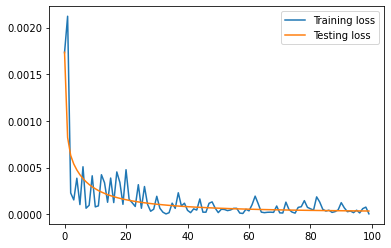

In [34]:
# Plot the training and testing losses
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Testing loss')
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.legend()
plt.title('SGD & Learning rate = 0.001')
plt.show()

In [19]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # you can adjust the learning rate

# Training loop
for epoch in range(100):  # you can adjust the number of epochs
    for i, (features, labels) in enumerate(train_loader):
        outputs = model(features)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()  # switch to evaluation mode
    with torch.no_grad():  # disable gradient computation to save memory
        total_loss = 0
        total_samples = 0
        for features, labels in test_loader:  # assume you have a DataLoader for the test set
            outputs = model(features)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * features.size(0)  # multiply by batch size to undo average
            total_samples += features.size(0)
        avg_test_loss = total_loss / total_samples  # compute average loss

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}, Train Loss: {loss.item()}, Avg Test Loss: {avg_test_loss}')

Epoch 10, Loss: 1.2584215891564554e-09
Epoch 20, Loss: 3.5438654322206276e-07
Epoch 30, Loss: 2.4979435186978094e-10
Epoch 40, Loss: 2.807813643812551e-07
Epoch 50, Loss: 9.409069434695994e-08
Epoch 60, Loss: 7.391890903818421e-07
Epoch 70, Loss: 1.0198602851119176e-08
Epoch 80, Loss: 5.733011398945109e-09
Epoch 90, Loss: 5.812207746203057e-07
Epoch 100, Loss: 2.471201241860399e-06


In [10]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # you can adjust the learning rate

train_losses = []
test_losses = []

# Training loop
for epoch in range(100):  # you can adjust the number of epochs
    for i, (features, labels) in enumerate(train_loader):
        outputs = model(features)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Save the training loss for this epoch
    train_losses.append(loss.item())
    
    model.eval()  # switch to evaluation mode
    with torch.no_grad():  # disable gradient computation to save memory
        total_loss = 0
        total_samples = 0
        for features, labels in test_loader:  # assume you have a DataLoader for the test set
            outputs = model(features)
            loss = criterion(outputs, labels)
            
            total_loss += loss.item() * features.size(0)  # multiply by batch size to undo average
            total_samples += features.size(0)
        avg_test_loss = total_loss / total_samples  # compute average loss

        # Save the test loss for this epoch
        test_losses.append(avg_test_loss)

    if (epoch + 1) % 20 == 0:
        print(f'Epoch {epoch+1}, Train Loss: {loss.item()}, Test Loss: {avg_test_loss}')

   

Epoch 20, Train Loss: 9.066408892977051e-06, Test Loss: 1.9340487329947004e-05
Epoch 40, Train Loss: 2.433933559586876e-06, Test Loss: 1.509068158401062e-05
Epoch 60, Train Loss: 1.2835255347454222e-06, Test Loss: 1.2970361772312934e-05
Epoch 80, Train Loss: 2.2099573016021168e-07, Test Loss: 1.1540311184621766e-05
Epoch 100, Train Loss: 3.052044235118956e-07, Test Loss: 1.0193913266519955e-05


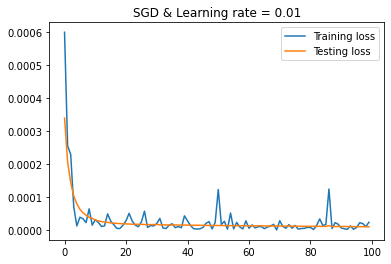

In [12]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Testing loss')
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.legend()
plt.title('SGD & Learning rate = 0.01')
plt.show()